# Programming assignment 1: Introduction to ML workflow and decision trees
### - Calvin Smith, Bragadesh Bharatwaj Sundararaman, Amogha Udayakumar

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### TASK 1: A classification example: fetal heart condition diagnosis

Loading the data:

In [ ]:
data = pd.read_csv('CTG.csv',skiprows = 1)

In [ ]:
# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


Implementing a dummy classifier:

In [ ]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')

In [ ]:
from sklearn.model_selection import cross_val_score

dummy_cross_val = np.mean(cross_val_score(clf,Xtrain,Ytrain))
print(dummy_cross_val)

0.7805882352941176


We choose to try out the following classifiers:

- Decision Tree
- Random Forest
- Gradient Boosting
- Linear Perceptron
-Logistic Regression
- Linear SVC
- Neural network MLP

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [ ]:
cross_val_acc = []

# Decision tree
clf_tree = DecisionTreeClassifier(random_state=1)

tree_cross_val = np.mean(cross_val_score(clf_tree,Xtrain,Ytrain))
cross_val_acc.append(tree_cross_val)
print(tree_cross_val)

0.9194117647058823


In [ ]:
# Random Forest
clf_RF = RandomForestClassifier(random_state=1)

RF_cross_val = np.mean(cross_val_score(clf_RF,Xtrain,Ytrain))
cross_val_acc.append(RF_cross_val)
print(RF_cross_val)

0.943529411764706


In [ ]:
# Gradient Boosting
clf_GB = GradientBoostingClassifier(random_state=1)

GB_cross_val = np.mean(cross_val_score(clf_GB,Xtrain,Ytrain))
cross_val_acc.append(GB_cross_val)
print(GB_cross_val)

0.9488235294117647


In [ ]:
# Linear Perceptron
clf_LP = Perceptron(random_state=1)
LP_cross_val = np.mean(cross_val_score(clf_LP, Xtrain, Ytrain))
cross_val_acc.append(LP_cross_val)
print(LP_cross_val)

0.8305882352941177


In [ ]:
# Logistic Regression
clf_LR = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, max_iter=500))
LR_cross_val = np.mean(cross_val_score(clf_LR, Xtrain, Ytrain))
cross_val_acc.append(LR_cross_val)
print(LR_cross_val)

0.891764705882353


In [ ]:
# Linear SVC
clf_LSVC = make_pipeline(StandardScaler(), LinearSVC(random_state=1, max_iter=10000))
LSVC_cross_val = np.mean(cross_val_score(clf_LSVC, Xtrain, Ytrain))
cross_val_acc.append(LSVC_cross_val)
print(LSVC_cross_val)

0.8911764705882353


In [ ]:
# Neural network - Multi-layer Perceptron
clf_MLP = MLPClassifier(random_state=1, hidden_layer_sizes=(100,100), max_iter=1000)
MLP_cross_val = np.mean(cross_val_score(clf_MLP, Xtrain, Ytrain))
cross_val_acc.append(MLP_cross_val)
print(MLP_cross_val)

0.8752941176470589


In [ ]:
max(cross_val_acc)

0.9488235294117647

We select the Gradient Boosting Classifier as it achieves the best CV accuracy during training. We then tune the hyperparamerters for the GB classifier using RandomSearch CV. That is, we randomly select 10 combinations of hyperparameters from the grid below and then perform a 5 fold cross validation and choose the model which obtains the best training score.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of estimators
n_estimators = [i for i in range(100,1001, 100)]

# Maximum depth
max_depth = [i for i in range(5,31,5)]

# min_sample_split
min_samples_split = [i for i in range(2,6)]

# min_samples_leaf
min_samples_leaf = [i for i in range(1,5)]

# Create the grid
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb = GradientBoostingClassifier(random_state=1)
gb_grid = RandomizedSearchCV(estimator = gb, param_distributions = grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
gb_grid.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [ ]:
# best parameters
gb_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [ ]:
# best model
best_gb = gb_grid.best_estimator_

The accuracy after evaluating on the test set is 0.929

Gradient boosting refers to a group of machine learning algorithms that combine many learning models to provide a strong predictive result. It is an ensemble algorithm where decision trees are fit on the negative gradient of the multinomial deviance loss function.

In [ ]:
from sklearn.metrics import accuracy_score
  
best_gb.fit(Xtrain, Ytrain)
Yguess = best_gb.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.9272300469483568


### TASK 2: Decision trees for classification

#### class DecisionTreeLeaf

In [ ]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

#### class DecisionTreeBranch

In [ ]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        


#### class DecisionTree

In [ ]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod
class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass


#### class TreeClassifier

In [ ]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point


In [ ]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)


#### MAIN

Tuning the hyperparameter max_depth by iterating over feasible values

In [ ]:
depth = [1,2,3,4,5,6,7,10,20,30]

acc = []
index = []
for i in depth:
  cls = TreeClassifier(max_depth = i,criterion = 'gini')
  cross_val_acc = np.mean(cross_val_score(cls,Xtrain,Ytrain))
  acc.append(cross_val_acc)
  index.append(i)

Best max_depth:

In [ ]:
best_val_acc = max(acc)
best_depth = index[acc.index(max(acc))]
print(best_depth)

7


In [ ]:
cls = TreeClassifier(max_depth=best_depth,criterion = 'gini')
cls.fit(Xtrain, Ytrain)
Yguess = cls.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.9131455399061033


The max depth of 7 provided the maximum cross validation accuracy. So we chose 7. The test accuracy obtained using this max_depth is : 0.9131 

In [ ]:
cls2 = TreeClassifier(max_depth=5,criterion = 'gini')
cls2.fit(Xtrain, Ytrain)

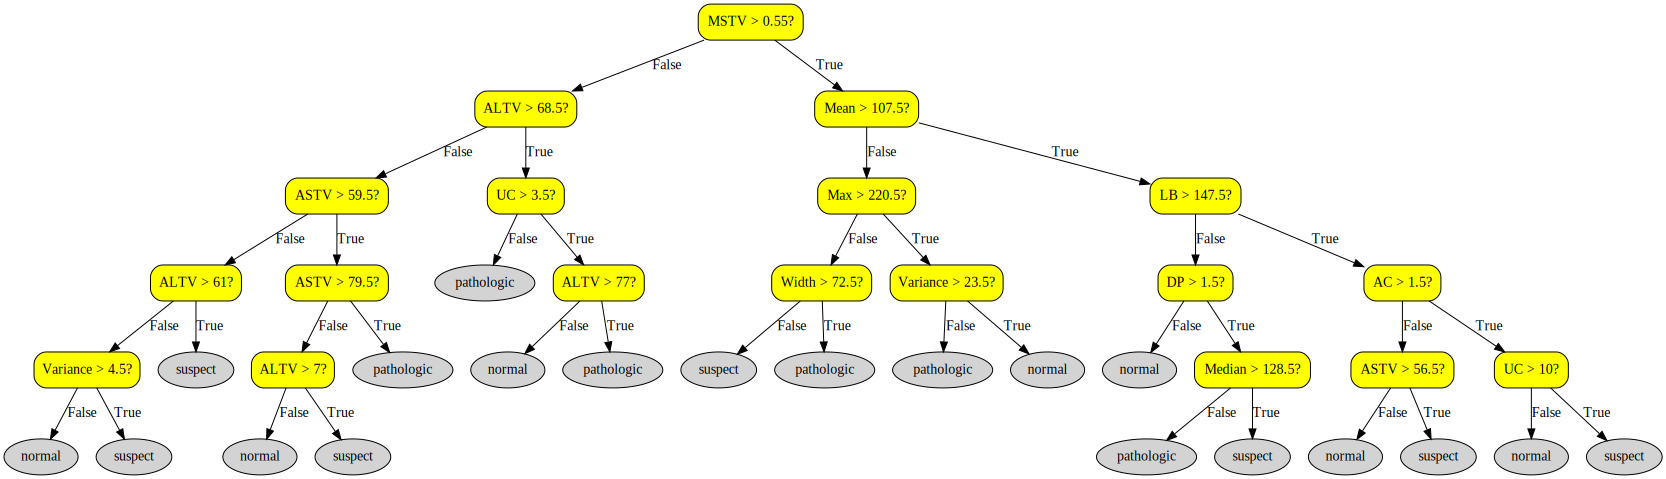

In [ ]:
cls2.draw_tree()

### TASK 3: A regression example: predicting apartment prices


Loading the data

In [ ]:
# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

Training a baseline dummy regressor

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.0025177 , 0.00195432, 0.0019362 , 0.0036149 , 0.00127172]),
 'score_time': array([0.00140214, 0.00064015, 0.00068784, 0.00041556, 0.00039315]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

Choosing the random forest regressor. A random forest regressor is an ensemble model that utlizes a number of decision trees on various subsets of the data and aggregates the results to provide a predictive output. Here several parameters such as the number of trees, maximum sample size, max depth, etc can be customized to get the desired results.

We use a randomized cross validation grid search to tune the hyperparameters of the model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

Creating the grid for RandomSearch.

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,'max_features':max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


Implementing randomized grid search. 

Randomly choosing n_iter = 10 combinations of the grid and evaluating using mean squared error. 

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(Xtrain, Ytrain)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

Best model:

In [ ]:
best_rf = rf_random.best_estimator_

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

Fitting model to training data. Evaluating on the test set.

In [ ]:
from sklearn.metrics import mean_squared_error

best_rf.fit(Xtrain,Ytrain)
mean_squared_error(Ytest,best_rf.predict(Xtest))

0.2774967209388873

The mean squared error obtained is: 0.277

Comparing with dummy regressor which obtains a mean squared error of 0.40

In [ ]:
m1.fit(Xtrain,Ytrain)
mean_squared_error(Ytest,m1.predict(Xtest))

0.4028398414133475

### Task 4: Decision trees for regression

#### class TreeRegressor

In [ ]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, RegressorMixin
from abc import ABC, abstractmethod

from collections import Counter

class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10):
        super().__init__(max_depth)
        
    def fit(self, X, Y):
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # Here we will select the mean value as the default value
    def get_default_value(self, Y):
        self.class_distribution = Y
        return np.mean(self.class_distribution)
    
    # Checks whether a set of output values is homogeneous.
    # Here we compute the variance of the items and if they are less than
    # the set threshold we call them as homogenoeous
    def is_homogeneous(self, Y):
        return np.var(self.class_distribution) < np.var(Y)/2
        
    # Finds the best splitting point for a given feature.
    #
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)
        var_t = np.var(Y)

        # The values corresponding to the parts *before and including*
        # and *after* the current element.
        
        low_distr = np.array([])
        high_distr = Y

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the low and high tables.
            low_distr = Y[0:i+1]
            high_distr = Y[i+2:n+1]

            
            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # We compute the score by using the variannce reduction function

            score = np.var(Y)- ((len(low_distr)/n)*np.var(low_distr)) - ((len(high_distr)/n)*np.var(high_distr))


            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

#### MAIN

In [ ]:
# function for creating som random data
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

In [ ]:
# creating random data
X, Y = make_some_data(100)

Plotting the data that we have produced. Since the data has real-valued Y outputs we should use a regression decision tree to describe this data.

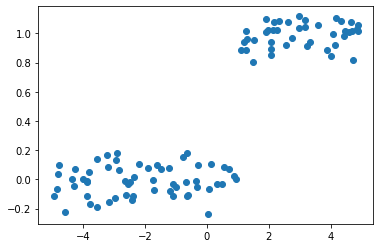

In [ ]:
plt.figure()
plt.scatter(X,Y)

Training the regression tree with max_depth = 1. This seems reasonable as the clusters look like they could be separated by one condition in X.

In [ ]:
reg = TreeRegressor(max_depth=1)
reg.fit(X,Y)
mean_squared_error(Y,reg.predict(X))

0.059008097139076385

code used for plotting the regression line we obtained above:

In [ ]:
X_test = np.arange(-5, 5.0, 0.01)[:, np.newaxis]
y_1 = reg.predict(X_test)

Plotting the data and the regression line. Looks like a reasonable fit.

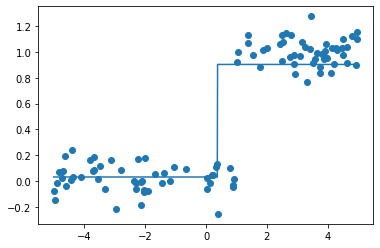

In [ ]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X_test,y_1)

Drawing the tree:

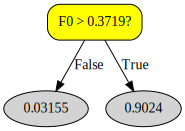

In [ ]:
reg.draw_tree()

If we instead use a large max_depth, in this case we set max_depth = 50, we can see pretty clearly that the model overfits the data and will generalzie poorly to other data.

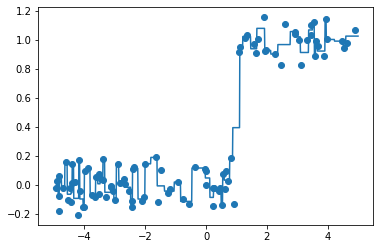

In [ ]:
reg1 = TreeRegressor(max_depth=50)
reg1.fit(X,Y)
mean_squared_error(Y,reg1.predict(X))


X_test = np.arange(-5, 5.0, 0.01)[:, np.newaxis]
y_2 = reg1.predict(X_test)

plt.figure()
plt.scatter(X,Y)
plt.plot(X_test,y_2)



Predicting apartment prices using decision tree regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [ ]:
depth = [1,2,3,4,5,6,7,10,11,12,20,30,50]


eval = []
index = []
for i in depth:
  print(i)
  reg = TreeRegressor(max_depth = i)
  cross_val = np.mean(cross_validate(reg,Xtrain,Ytrain, scoring ="neg_mean_squared_error")['test_score'])
  eval.append(cross_val)
  index.append(i)

1
2
3
4
5
6
7
10
11
12
20
30
50


In [ ]:
best_val = max(eval)
best_depth = index[eval.index(max(eval))]

We are using a max_depth of 12 since it provided the best cross-val score.

The mean-squared error we got on the test set is 0.329

In [ ]:
reg = TreeRegressor(max_depth=best_depth)
reg.fit(Xtrain,Ytrain)
mean_squared_error(Ytest, reg.predict(Xtest))

0.3295088642529806

Underfitting and Overfitting

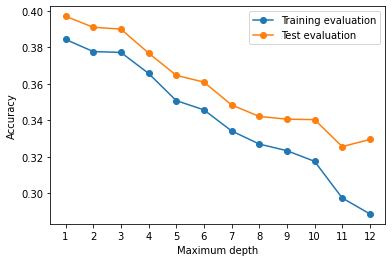

In [ ]:
train_acc = []
test_acc = []
max_depth = []

for i in range(1,13):
  reg = TreeRegressor(max_depth = i)
  reg.fit(Xtrain, Ytrain)
  mean_squared_error(Ytrain,(reg.predict(Xtrain)))
  train_acc.append(mean_squared_error(Ytrain,(reg.predict(Xtrain))))
  test_acc.append(mean_squared_error(Ytest,(reg.predict(Xtest))))

  max_depth.append(i)

plt.plot(max_depth,train_acc, label="Training evaluation", marker='o')
plt.plot(max_depth,test_acc,label="Test evaluation",marker='o')
plt.xticks(max_depth)
plt.ylabel("Accuracy")
plt.xlabel("Maximum depth")
plt.legend()
plt.show()

The plot shows the mean squared errors for the train and test set when increasing the max_depth. We can see that the MSE decreases with an increase in the max_depth until around 11, when the model starts overfitting the training data and the testing MSE starts to increase.